In [1]:
from sklearn.tree import DecisionTreeRegressor

In [2]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import pylab as plot

In [3]:
train = pd.read_csv('./datas/train.csv')

In [4]:
dong = pd.read_csv("./datas/dongrank.csv")

In [5]:
train = pd.merge(train, dong, on=["dong","city"])

In [6]:
train.rename(columns={'index':'dong3'},inplace=True)
train['P/m^2'] = train['transaction_real_price']/train['exclusive_use_area'] # 평당가격 column 추가
train['year'] =  round(train['transaction_year_month'] / 100)
train['month'] = train['transaction_year_month'] % 100

train = train[['transaction_id', 'apartment_id', 'city',  'dong', 'jibun', 'apt',
               'addr_kr', 'exclusive_use_area', 'year_of_completion',
               'transaction_year_month','year', 'month', 'transaction_date', 'floor', 'P/m^2',
               'transaction_real_price',"dong3"]]

In [7]:
train["dong2"] = train["dong3"].astype('category')
train["transaction_id2"] = train["transaction_id"].astype('category')
train["apartment_id2"] = train["apartment_id"].astype('category')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1216553 entries, 0 to 1216552
Data columns (total 20 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   transaction_id          1216553 non-null  int64   
 1   apartment_id            1216553 non-null  int64   
 2   city                    1216553 non-null  object  
 3   dong                    1216553 non-null  object  
 4   jibun                   1216553 non-null  object  
 5   apt                     1216553 non-null  object  
 6   addr_kr                 1216553 non-null  object  
 7   exclusive_use_area      1216553 non-null  float64 
 8   year_of_completion      1216553 non-null  int64   
 9   transaction_year_month  1216553 non-null  int64   
 10  year                    1216553 non-null  float64 
 11  month                   1216553 non-null  int64   
 12  transaction_date        1216553 non-null  object  
 13  floor                   1216553 non-null  

In [9]:
train.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,year,month,transaction_date,floor,P/m^2,transaction_real_price,dong3,dong2,transaction_id2,apartment_id2
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,2008.0,1,21~31,2,442.112709,37500,354,354,0,7622
1,98,7623,서울특별시,신교동,6-11,신현(102동),신교동 6-11 신현(102동),84.82,2002,200803,2008.0,3,11~20,2,463.334119,39300,354,354,98,7623
2,511,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200903,2009.0,3,21~31,3,473.944824,40200,354,354,511,7622
3,840,7623,서울특별시,신교동,6-11,신현(102동),신교동 6-11 신현(102동),81.02,2002,200909,2009.0,9,1~10,1,527.647494,42750,354,354,840,7623
4,1201,7623,서울특별시,신교동,6-11,신현(102동),신교동 6-11 신현(102동),84.82,2002,201011,2010.0,11,21~30,3,609.526055,51700,354,354,1201,7623


In [10]:
train_x = train[["dong2","apartment_id2","exclusive_use_area","year_of_completion","year","month","floor"]]
train_y = train[["transaction_real_price"]]

test_x = train[["dong2","apartment_id2","exclusive_use_area","year_of_completion","year","month","floor"]]
test_y = train[["transaction_real_price"]]

In [11]:
train

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,year,month,transaction_date,floor,P/m^2,transaction_real_price,dong3,dong2,transaction_id2,apartment_id2
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.8200,2002,200801,2008.0,1,21~31,2,442.112709,37500,354,354,0,7622
1,98,7623,서울특별시,신교동,6-11,신현(102동),신교동 6-11 신현(102동),84.8200,2002,200803,2008.0,3,11~20,2,463.334119,39300,354,354,98,7623
2,511,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.8200,2002,200903,2009.0,3,21~31,3,473.944824,40200,354,354,511,7622
3,840,7623,서울특별시,신교동,6-11,신현(102동),신교동 6-11 신현(102동),81.0200,2002,200909,2009.0,9,1~10,1,527.647494,42750,354,354,840,7623
4,1201,7623,서울특별시,신교동,6-11,신현(102동),신교동 6-11 신현(102동),84.8200,2002,201011,2010.0,11,21~30,3,609.526055,51700,354,354,1201,7623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216548,1226761,8987,부산광역시,녹산동,262-1,유나베네스1차,녹산동 262-1 유나베네스1차,62.2475,2017,201710,2017.0,10,21~31,5,305.233142,19000,105,105,1226761,8987
1216549,1226762,8987,부산광역시,녹산동,262-1,유나베네스1차,녹산동 262-1 유나베네스1차,62.2475,2017,201710,2017.0,10,21~31,2,302.020161,18800,105,105,1226762,8987
1216550,1226763,8987,부산광역시,녹산동,262-1,유나베네스1차,녹산동 262-1 유나베네스1차,72.5242,2017,201710,2017.0,10,21~31,2,286.800820,20800,105,105,1226763,8987
1216551,1226764,8987,부산광역시,녹산동,262-1,유나베네스1차,녹산동 262-1 유나베네스1차,72.5242,2017,201710,2017.0,10,21~31,11,289.558520,21000,105,105,1226764,8987


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
x = train[["dong2","apartment_id2","exclusive_use_area","year_of_completion","year","month","floor"]]
y = train[["transaction_real_price"]]

In [15]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state=13)

#max_depth_list = []

model = RandomForestRegressor(n_estimators=100, random_state=13, max_depth=80, max_leaf_nodes=5000)
model.fit(train_x, train_y)

RandomForestRegressor(max_depth=80, max_leaf_nodes=5000, random_state=13)

In [16]:
pred_test = model.predict(test_x)
mse = mean_squared_error(test_y, pred_test)
r2 = r2_score(test_y, pred_test)
rmse = mean_squared_error(test_y, pred_test)**0.5

In [17]:
print('Mean squared error: ', mse)
print('R2 score: ', r2)
print('RMSE score:', rmse)

Mean squared error:  29631349.445886824
R2 score:  0.9692014870838667
RMSE score: 5443.468512436425


In [2]:
test = pd.read_csv('datas/test.csv')

In [19]:
test = pd.merge(test, dong, on=["dong","city"])

In [20]:
test

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,Unnamed: 0,index
0,1145756,10453,서울특별시,목동,938,청학,목동 938 청학,35.55,2002,201711,11~20,2,429,429
1,1146181,4419,서울특별시,목동,539-4,목동효성,목동 539-4 목동효성,84.80,2003,201712,1~10,4,429,429
2,1146298,4407,서울특별시,목동,911,목동신시가지6,목동 911 목동신시가지6,65.10,1986,201712,21~31,15,429,429
3,1142555,7911,서울특별시,목동,774-10,애드웰(774-10),목동 774-10 애드웰(774-10),73.41,2004,201704,21~30,5,429,429
4,1146303,1691,서울특별시,목동,768-5,금호아파트(768),목동 768-5 금호아파트(768),59.67,1995,201712,21~31,1,429,429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5458,1231750,10059,부산광역시,감전동,252-1,진원하이빌1차,감전동 252-1 진원하이빌1차,57.10,2000,201705,11~20,5,70,70
5459,1141375,7593,서울특별시,노고산동,1-3,신촌포스빌,노고산동 1-3 신촌포스빌,32.34,2004,201712,11~20,3,97,97
5460,1093414,7754,서울특별시,명륜2가,4,아남1,명륜2가 4 아남1,84.90,1995,201712,21~31,18,373,373
5461,1093343,7756,서울특별시,명륜2가,237,아남3,명륜2가 237 아남3,47.43,1999,201711,21~30,6,373,373


In [21]:
test.rename(columns={'index':'dong3'},inplace=True)
test['year'] =  round(test['transaction_year_month'] / 100)
test['month'] = test['transaction_year_month'] % 100


In [22]:
test["dong2"] = test["dong3"].astype('category')
test["transaction_id2"] = test["transaction_id"].astype('category')
test["apartment_id2"] = test["apartment_id"].astype('category')

In [23]:
x = test[["dong2","apartment_id2","exclusive_use_area","year_of_completion","year","month","floor"]]

In [24]:
pred_sol = model.predict(x)

In [37]:
x

,dong2,apartment_id2,exclusive_use_area,year_of_completion,year,month,floor
0,429,10453,35.55,2002,2017.0,11,2
1,429,4419,84.80,2003,2017.0,12,4
2,429,4407,65.10,1986,2017.0,12,15
3,429,7911,73.41,2004,2017.0,4,5
4,429,1691,59.67,1995,2017.0,12,1
...,...,...,...,...,...,...,...
5458,70,10059,57.10,2000,2017.0,5,5
5459,97,7593,32.34,2004,2017.0,12,3
5460,373,7754,84.90,1995,2017.0,12,18
5461,373,7756,47.43,1999,2017.0,11,6


In [34]:
len(pred_sol)

5463

In [27]:
sol= pd.read_csv('datas/Sol.csv')

In [31]:
sol

,transaction_id,transaction_real_price
0,1145756,35193.200051
1,1198704,70607.383442
2,1222384,87834.392230
3,1179897,46283.301411
4,1223091,48227.736583
...,...,...
5458,1174640,17791.250292
5459,1175575,22328.542781
5460,1157024,61594.029724
5461,1136863,30998.817482


In [30]:
sol['transaction_real_price'] = pred_sol

In [32]:
sol.to_csv('datas/sol_RF.csv')

In [39]:
sol_lgbm = pd.read_csv('datas/Sol_m2.csv')

In [44]:
sol_rf = sol_rf.rename(columns={'transaction_real_price':'rf'})

In [46]:
sol_lgbm= sol_lgbm.rename(columns={'transaction_real_price':'lgbm'})

In [48]:
sol_all = sol_rf.merge(sol_lgbm)

In [49]:
rmse = mean_squared_error(sol_all['lgbm'], sol_all['rf'])**0.5

<AxesSubplot:xlabel='lgbm', ylabel='rf'>

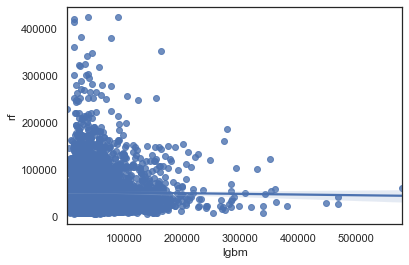

In [53]:
sns.regplot(x = sol_all['lgbm'], y = sol_all['rf'], data = sol_all)

In [54]:
sol_rf.sort_values('rf')

,transaction_id,rf
3201,1134299,4546.397146
3401,1196537,4546.397146
3212,1190426,4546.397146
3195,1101329,4546.397146
5368,1121534,4546.397146
...,...,...
1720,1107671,381156.775262
4008,1198446,413962.827629
1898,1134380,420649.212651
1916,1107771,425138.429242


In [56]:
sol_all['-'] = np.abs((sol_all['rf'] - sol_all['lgbm'])/ sol_all['lgbm']) 

In [92]:
sol_all.sort_values('-').tail(50)

,transaction_id,rf,lgbm,-
5018,1175753,69302.817924,69312.509360,0.000140
4145,1121705,27035.994194,27026.932230,0.000335
2541,1134244,46691.587671,46739.499000,0.001025
2740,1107549,38671.762602,38622.020550,0.001288
2166,1131635,40240.414869,40300.469380,0.001490
...,...,...,...,...
997,1208039,120167.628056,4296.178944,26.970815
4008,1198446,413962.827629,14589.925340,27.373197
992,1228845,146340.548911,4944.777162,28.594973
1898,1134380,420649.212651,13067.773210,31.189816


In [4]:
test[test['transaction_id'] == 1134380]

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor
1898,1134380,9171,서울특별시,응암동,88-8,응암아네스트,응암동 88-8 응암아네스트,13.6244,2014,201712,1~10,11


In [70]:
dong[dong['dong'] == '좌천동']

,Unnamed: 0,index,dong,city
48,48,48,좌천동,부산광역시


In [72]:
dongva = pd.read_csv('datas/dongmean.csv')

In [78]:
dongva[dongva['dong'] == '응암동']

,Unnamed: 0,dong,city,mean,bmean,amean
354,354,응암동,서울특별시,35787.61799,35787.61799,35787.61799


In [80]:
train[train['dong'] == '응암동'].mean()

transaction_id            373524.945061
apartment_id                5411.657273
exclusive_use_area            77.506807
year_of_completion          2005.920865
transaction_year_month    201372.287219
year                        2013.659835
month                          6.303729
floor                          7.573868
P/m^2                        470.484438
transaction_real_price     35787.617990
dong3                        229.000000
dtype: float64

In [97]:
a = sol_all.sort_values('-')[2732:]

In [96]:
b = sol_all.sort_values('-')[:2732]

In [122]:
a

,transaction_id,rf,lgbm,-
237,1131202,54968.507730,34688.257460,0.584643
3259,1230612,10306.267647,24816.857310,0.584707
1106,1175725,55049.516873,132974.131200,0.586013
3216,1196185,14842.751349,35869.002610,0.586196
213,1190712,27886.701398,67411.138650,0.586319
...,...,...,...,...
997,1208039,120167.628056,4296.178944,26.970815
4008,1198446,413962.827629,14589.925340,27.373197
992,1228845,146340.548911,4944.777162,28.594973
1898,1134380,420649.212651,13067.773210,31.189816


In [123]:
a = a[['transaction_id', '-']]

In [124]:
b = b[['transaction_id', '-']]

In [127]:
test.merge(a).mean()

transaction_id            1.173441e+06
apartment_id              6.343438e+03
exclusive_use_area        7.853238e+01
year_of_completion        1.999919e+03
transaction_year_month    2.017100e+05
floor                     8.015745e+00
Unnamed: 0                2.324431e+02
dong3                     2.324431e+02
year                      2.017000e+03
month                     9.972538e+00
-                         1.950043e+00
dtype: float64

In [130]:
pd.DataFrame([test.merge(a).mean() , test.merge(b).mean()])

,transaction_id,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,Unnamed: 0,dong3,year,month,-
0,1.173441e+06,6343.437569,78.532380,1999.919077,201709.972538,8.015745,232.443061,232.443061,2017.0,9.972538,1.950043
1,1.160813e+06,6231.724744,80.457768,2000.942899,201710.484261,8.517936,257.799414,257.799414,2017.0,10.484261,0.295828
